# Project: Image Classification


Develop a machine learning model to classify images into diferent categories. Using  machine learning techniques to build a robust image classifier to understand the datatset, classes and look for the best and accurate classification performance

In [2]:
## Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [3]:
# Load train and test data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## Data Analysis

I have chosen the Fashion-MNIST dataset, which consists of 60,000 training images and 10,000 testing images. Each image is a grayscale 28x28 pixel representation of a fashion item, categorized into 10 classes as we see below

In [3]:
# Dataset Analysis
print("Train Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Labels Shape:", y_test.shape)
print("Train Data classes:", len(set(y_train.flatten())))
print("Test Data classes:", len(set(y_test.flatten())))

Train Data Shape: (60000, 28, 28)
Test Data Shape: (10000, 28, 28)
Train Labels Shape: (60000,)
Test Labels Shape: (10000,)
Train Data classes: 10
Test Data classes: 10


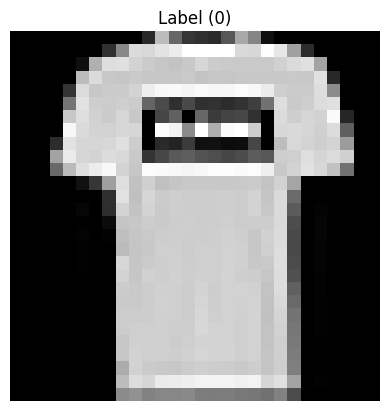

In [4]:
# Select a random sample from the training data
sample_index = 1  # Change this to view different samples
sample_image = X_train[sample_index]
sample_label = y_train[sample_index]

# Display the sample image
plt.imshow(sample_image, cmap='gray')
plt.title(f'Label ({sample_label})')
plt.axis('off')
plt.show()

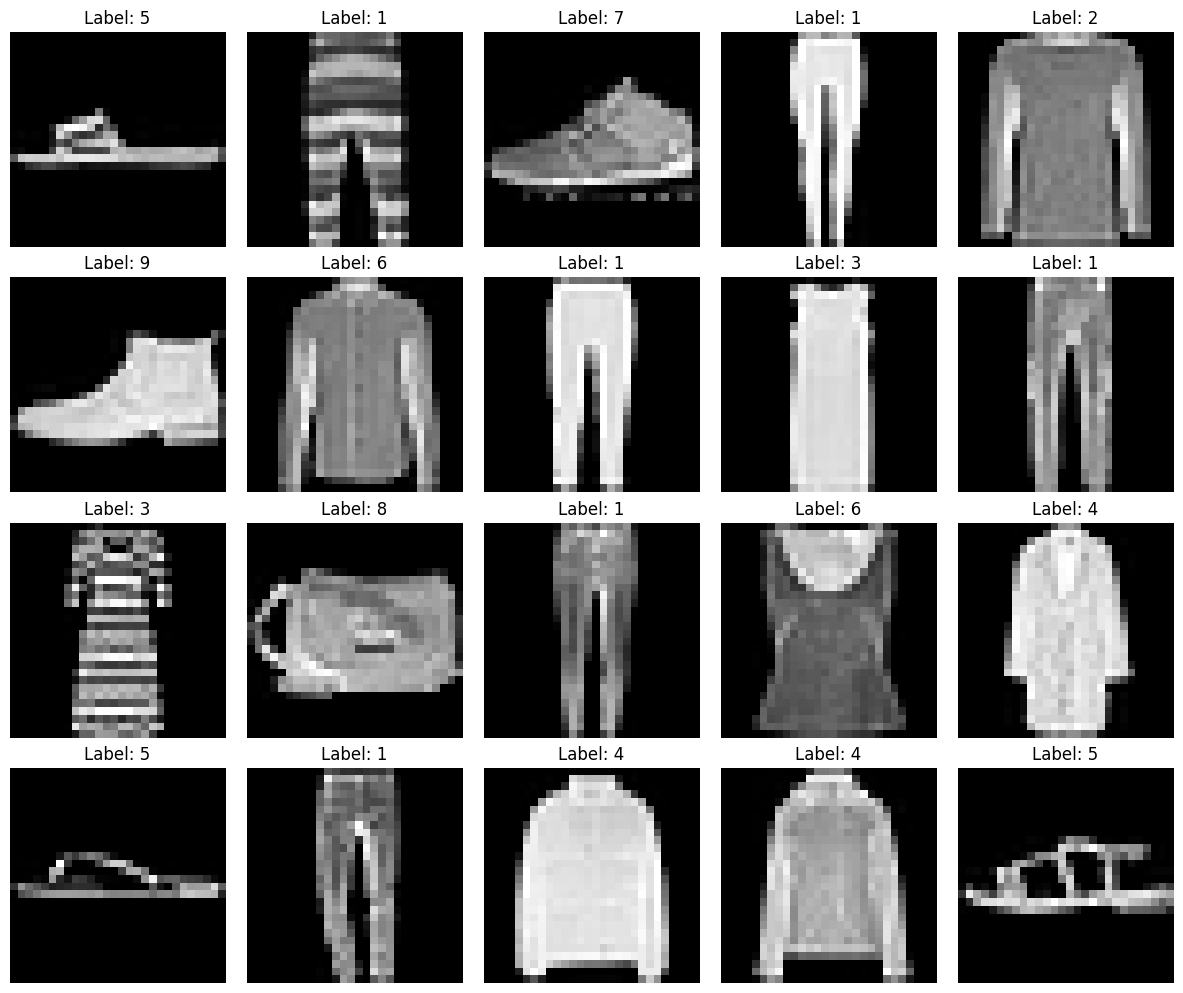

In [5]:
# Define the number of rows and columns for subplots
num_rows = 4
num_cols = 5
num_samples = num_rows * num_cols

# Randomly select samples
random_indices = np.random.choice(len(X_train), size=num_samples, replace=False)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Flatten the axes array
axes = axes.flatten()

# Display samples
for i, index in enumerate(random_indices):
    sample_image = X_train[index]
    sample_label = y_train[index]
    
    axes[i].imshow(sample_image, cmap='gray')
    axes[i].set_title(f'Label: {sample_label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Feature Analysis

As per dataset information we expect to find the following examples/images in the dataset:
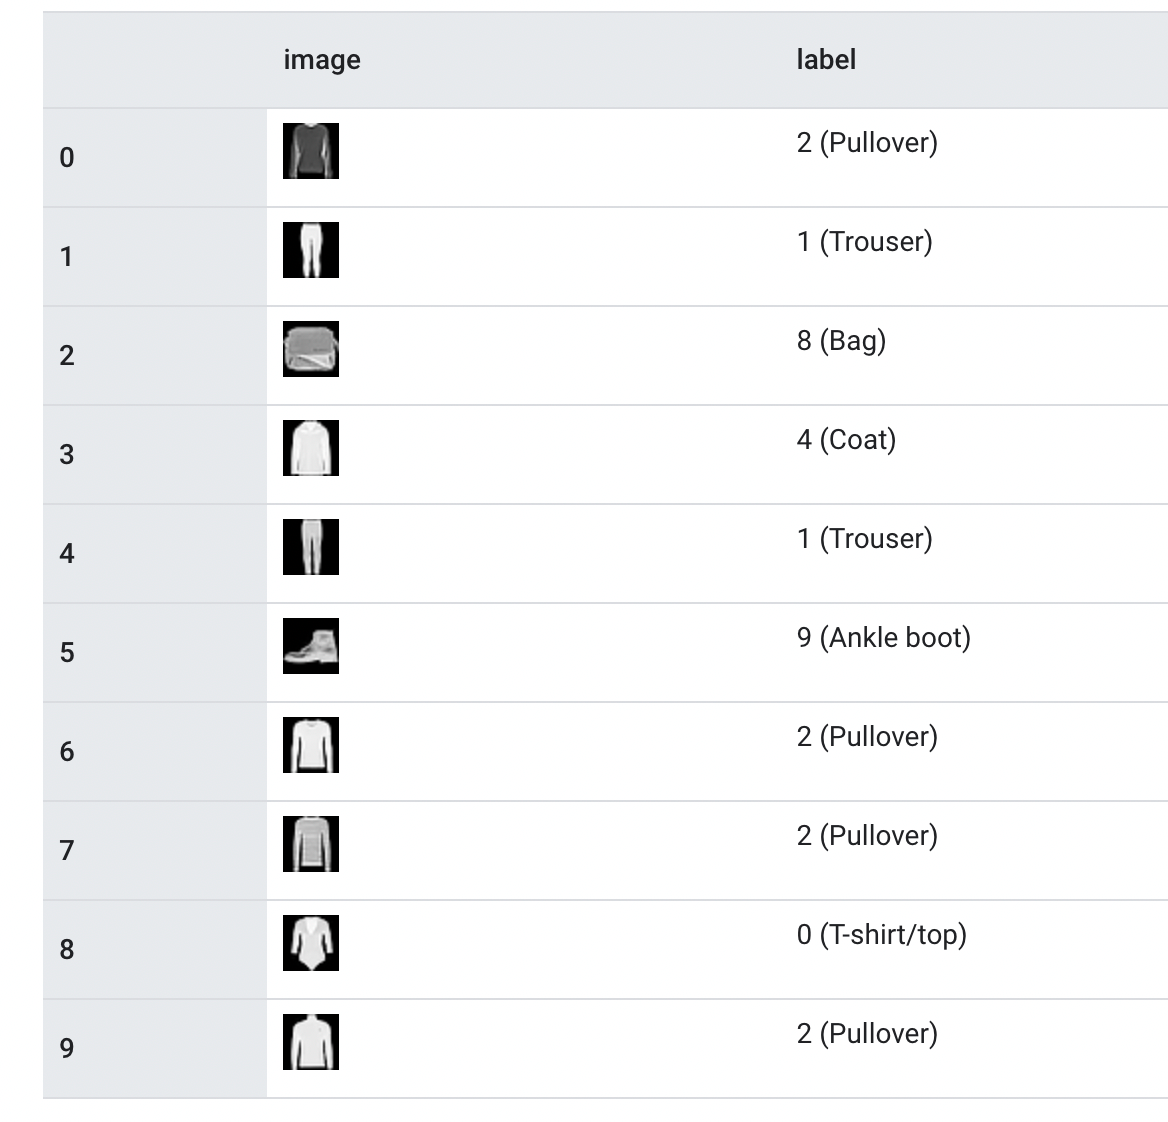

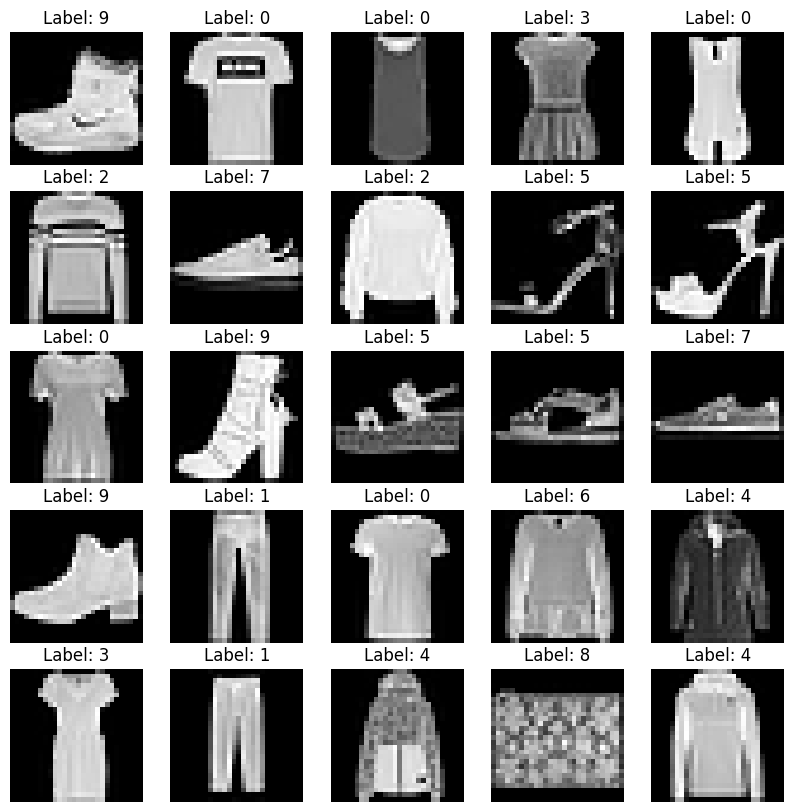

In [6]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()


## Visualize Dataset

As we can see all tha number of classes and train and test data are the same, so because the number of samples are well distributed for each class it is expected.

In [7]:
print("Train Data classes:", len(set(y_train.flatten())))
print("Test Data classes:", len(set(y_test.flatten())))

Train Data classes: 10
Test Data classes: 10


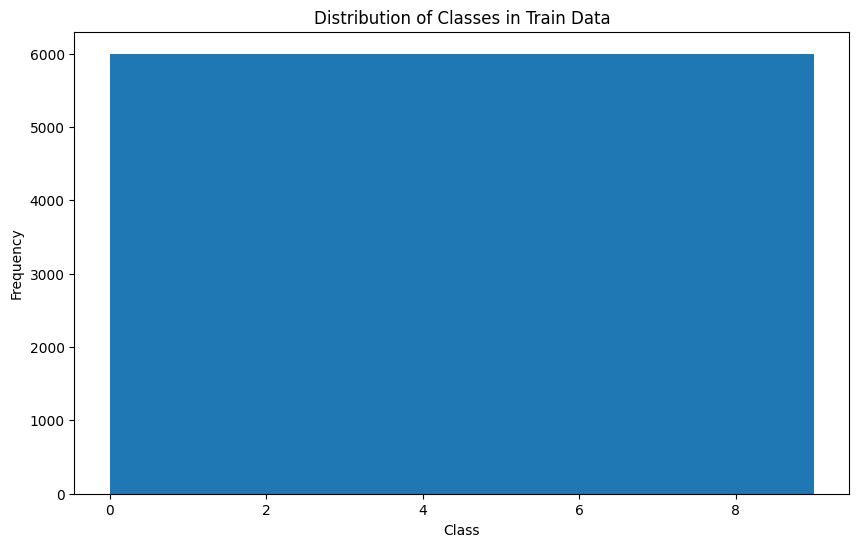

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=10)
plt.title('Distribution of Classes in Train Data')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

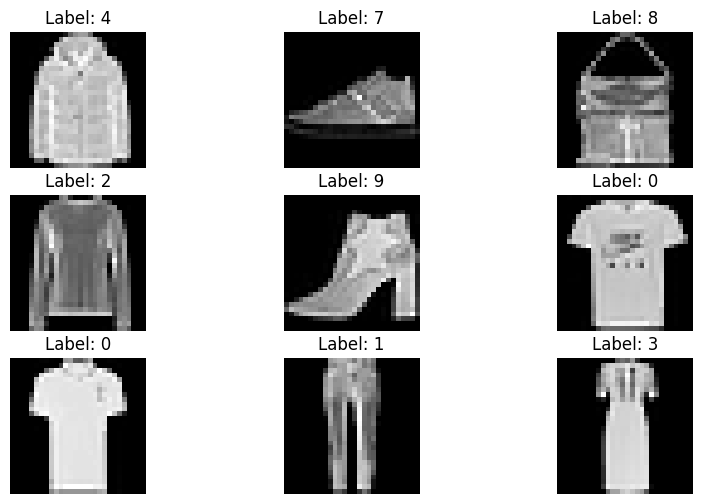

In [9]:
plt.figure(figsize=(10, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    random_index = np.random.randint(0, len(X_train))
    plt.imshow(X_train[random_index], cmap='gray')
    plt.title(f'Label: {y_train[random_index]}')
    plt.axis('off')
plt.show()


# Apply ML Models

In [4]:
# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Normalize the pixel values
X_train_flat = X_train_flat.astype('float32') / 255
X_test_flat = X_test_flat.astype('float32') / 255

## Support Vector Machine (SVM)

In [11]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm_model = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_model.fit(X_train_flat, y_train.ravel())
svm_pred = svm_model.predict(X_test_flat)

print(classification_report(y_test.ravel(), svm_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.79      0.82      0.80      1000
           3       0.87      0.89      0.88      1000
           4       0.81      0.81      0.81      1000
           5       0.96      0.95      0.96      1000
           6       0.72      0.66      0.69      1000
           7       0.93      0.95      0.94      1000
           8       0.97      0.98      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [13]:
# Fine tuning hyperparameters Support Vector Machine
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
	'C': [0.1, 1, 10],
	'kernel': ['linear', 'rbf'],
	'gamma': [0.001, 0.01, 0.1]
}

grid_search = GridSearchCV(svm_model, param_grid, cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train_flat, y_train.ravel())

# Get the best hyperparameters and retrain the model
best_params = grid_search.best_params_
best_model_classifier = SVC(random_state=42, **best_params)
best_model_classifier.fit(X_train_flat, y_train)

# Evaluate best model on validation set
y_val_pred_tuned = best_model_classifier.predict(X_test_flat)

# Generate classification report for the tuned model
print(classification_report(y_test, y_val_pred_tuned))

Fitting 3 folds for each of 18 candidates, totalling 54 fits


In [ ]:
# Visualize Support Vector Machine (SVM) Predictions
plt.figure(figsize=(10, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    index = np.random.randint(0, len(X_test))
    plt.imshow(X_test[index], cmap='gray')
    plt.title(f"True: {y_test[index]}, Predicted: {svm_pred[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Random Forest Classifier

In [5]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_flat, y_train.ravel())
rf_pred = rf_model.predict(X_test_flat)

print(classification_report(y_test.ravel(), rf_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.76      0.81      0.78      1000
           3       0.88      0.90      0.89      1000
           4       0.77      0.81      0.79      1000
           5       0.97      0.96      0.97      1000
           6       0.72      0.58      0.64      1000
           7       0.92      0.95      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [27]:
# Fine tuning hyperparameters Random Forest Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
	'n_estimators': [100, 200, 300],
	'max_depth': [None, 10, 20],
	'min_samples_split': [2, 5, 10],
	'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(rf_model, param_grid, cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train_flat, y_train.ravel())

# Get the best hyperparameters and retrain the model
best_params = grid_search.best_params_
best_model_classifier = RandomForestClassifier(n_estimators=100, random_state=42, **best_params)
best_model_classifier.fit(X_train_flat, y_train)

# Evaluate best model on validation set
y_val_pred_tuned = best_model_classifier.predict(X_test_flat)

# Generate classification report for the tuned model
print(classification_report(y_test, y_val_pred_tuned))

Fitting 3 folds for each of 81 candidates, totalling 243 fits


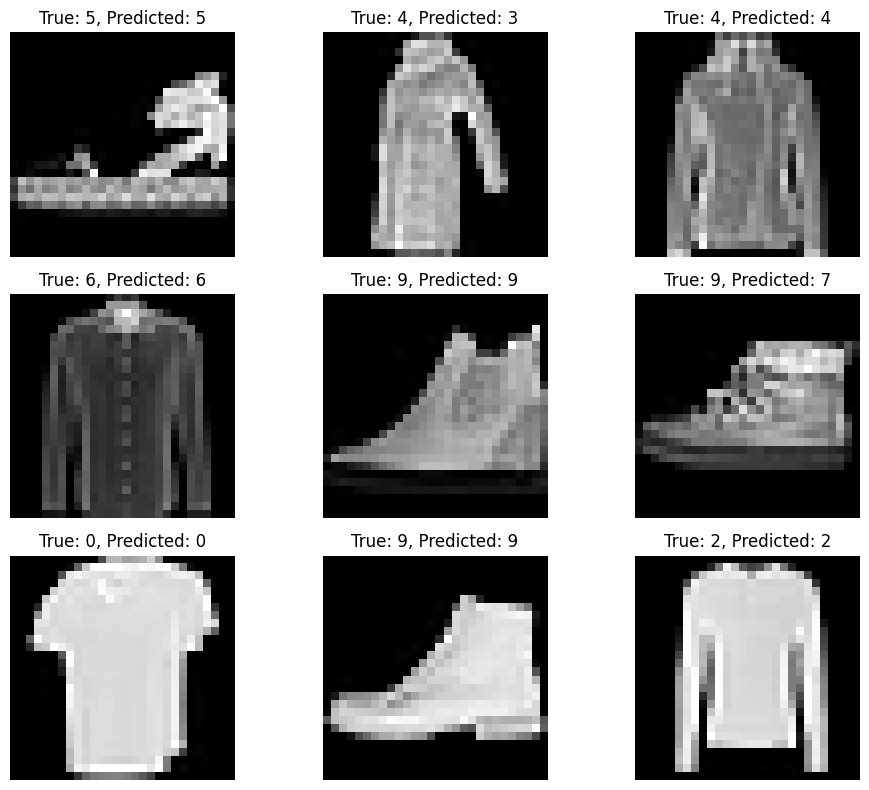

In [6]:
# Visualize Random Forest Classifier Predictions
plt.figure(figsize=(10, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    index = np.random.randint(0, len(X_test))
    plt.imshow(X_test[index], cmap='gray')
    plt.title(f"True: {y_test[index]}, Predicted: {rf_pred[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


## Decision Tree Classifier

In [5]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train_flat, y_train.ravel())
tree_classifier_pred = tree_classifier.predict(X_test_flat)

print(classification_report(y_test.ravel(), tree_classifier_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1000
           1       0.95      0.95      0.95      1000
           2       0.64      0.64      0.64      1000
           3       0.82      0.78      0.80      1000
           4       0.66      0.66      0.66      1000
           5       0.91      0.89      0.90      1000
           6       0.52      0.55      0.54      1000
           7       0.87      0.88      0.88      1000
           8       0.91      0.91      0.91      1000
           9       0.89      0.91      0.90      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



In [6]:
# Fine tuning hyperparameters Decision Tree Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(tree_classifier, param_grid, cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train_flat, y_train.ravel())

# Get the best hyperparameters and retrain the model
best_params = grid_search.best_params_
best_model_classifier = DecisionTreeClassifier(random_state=42, **best_params)
best_model_classifier.fit(X_train_flat, y_train)

# Evaluate best model on validation set
y_val_pred_tuned = best_model_classifier.predict(X_test_flat)

# Generate classification report for the tuned model
print(classification_report(y_test, y_val_pred_tuned))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1000
           1       0.98      0.92      0.95      1000
           2       0.64      0.67      0.65      1000
           3       0.82      0.81      0.82      1000
           4       0.60      0.73      0.66      1000
           5       0.93      0.88      0.90      1000
           6       0.58      0.50      0.54      1000
           7       0.86      0.92      0.89      1000
           8       0.93      0.90      0.91      1000
           9       0.92      0.90      0.91      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



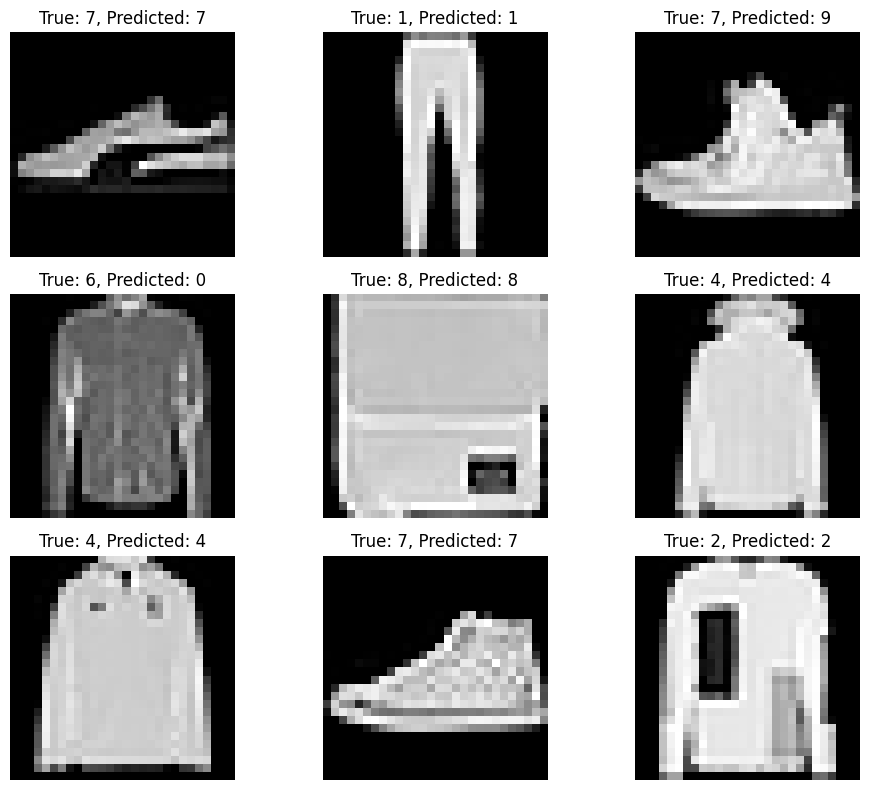

In [7]:
# Visualize Decision Tree Classifier Predictions
plt.figure(figsize=(10, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    index = np.random.randint(0, len(X_test))
    plt.imshow(X_test[index], cmap='gray')
    plt.title(f"True: {y_test[index]}, Predicted: {tree_classifier_pred[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Logistic Regression

In [11]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_flat, y_train.ravel())
lr_model_pred = lr_model.predict(X_test_flat)

print(classification_report(y_test.ravel(), lr_model_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1000
           1       0.97      0.96      0.96      1000
           2       0.72      0.74      0.73      1000
           3       0.83      0.86      0.84      1000
           4       0.74      0.76      0.75      1000
           5       0.95      0.92      0.93      1000
           6       0.63      0.57      0.60      1000
           7       0.91      0.94      0.93      1000
           8       0.93      0.94      0.93      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [12]:
# Fine tuning hyperparameters Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
	'C': [0.001, 0.01, 0.1, 1, 10],
	'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(lr_model, param_grid, cv=5)
grid_search.fit(X_train_flat, y_train.ravel())

# Get the best hyperparameters and retrain the model
best_params = grid_search.best_params_
best_model_classifier = LogisticRegression(max_iter=1000, random_state=42, **best_params)
best_model_classifier.fit(X_train_flat, y_train)

# Evaluate best model on validation set
y_val_pred_tuned = best_model_classifier.predict(X_test_flat)

# Generate classification report for the tuned model
print(classification_report(y_test, y_val_pred_tuned))

/Users/jnova/.pyenv/versions/3.9.10/envs/csis3290/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Naive Bayes

In [6]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

nb_model = GaussianNB()
nb_model.fit(X_train_flat, y_train.ravel())
nb_model_pred = nb_model.predict(X_test_flat)

print(classification_report(y_test.ravel(), nb_model_pred))

              precision    recall  f1-score   support

           0       0.81      0.59      0.68      1000
           1       0.64      0.94      0.76      1000
           2       0.59      0.32      0.42      1000
           3       0.44      0.55      0.49      1000
           4       0.38      0.78      0.51      1000
           5       0.93      0.28      0.43      1000
           6       0.32      0.04      0.07      1000
           7       0.51      0.99      0.67      1000
           8       0.83      0.71      0.77      1000
           9       0.91      0.67      0.77      1000

    accuracy                           0.59     10000
   macro avg       0.64      0.59      0.56     10000
weighted avg       0.64      0.59      0.56     10000



In [8]:
# Fine tuning hyperparameters Naive Bayes
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
	'var_smoothing': np.logspace(-10, 0, 11)
}

grid_search = GridSearchCV(nb_model, param_grid, cv=5)
grid_search.fit(X_train_flat, y_train.ravel())

# Get the best hyperparameters and retrain the model
best_params = grid_search.best_params_
best_model_classifier = GaussianNB(**best_params)
best_model_classifier.fit(X_train_flat, y_train)

# Evaluate best model on validation set
y_val_pred_tuned = best_model_classifier.predict(X_test_flat)

# Generate classification report for the tuned model
print(classification_report(y_test, y_val_pred_tuned))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72      1000
           1       0.92      0.90      0.91      1000
           2       0.61      0.36      0.46      1000
           3       0.59      0.84      0.70      1000
           4       0.50      0.69      0.58      1000
           5       0.63      0.46      0.53      1000
           6       0.34      0.20      0.26      1000
           7       0.59      0.95      0.73      1000
           8       0.90      0.79      0.84      1000
           9       0.91      0.82      0.87      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.66     10000
weighted avg       0.68      0.67      0.66     10000



In [ ]:
# Visualize Decision Naive Bayes Predictions
plt.figure(figsize=(10, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    index = np.random.randint(0, len(X_test))
    plt.imshow(X_test[index], cmap='gray')
    plt.title(f"True: {y_test[index]}, Predicted: {nb_model_pred[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Convolutional Neural Networks (CNN)

In [7]:
# Convolutional Neural Networks Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for Fashion-MNIST
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)
cnn_pred = cnn_model.predict(X_test)
print("CNN Validation Accuracy:", cnn_accuracy)

Epoch 1/10


/Users/jnova/.pyenv/versions/3.9.10/envs/csis3290/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.7830 - loss: 1.0900 - val_accuracy: 0.8617 - val_loss: 0.3740
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8797 - loss: 0.3260 - val_accuracy: 0.8726 - val_loss: 0.3500
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8944 - loss: 0.2841 - val_accuracy: 0.8835 - val_loss: 0.3161
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9007 - loss: 0.2598 - val_accuracy: 0.8899 - val_loss: 0.3063
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9096 - loss: 0.2387 - val_accuracy: 0.8973 - val_loss: 0.2964
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9192 - loss: 0.2117 - val_accuracy: 0.8907 - val_loss: 0.3163
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9268 - loss: 0.1950 - val_accuracy: 0.8935 - val_loss: 0.3161
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9306 - loss: 0.18

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


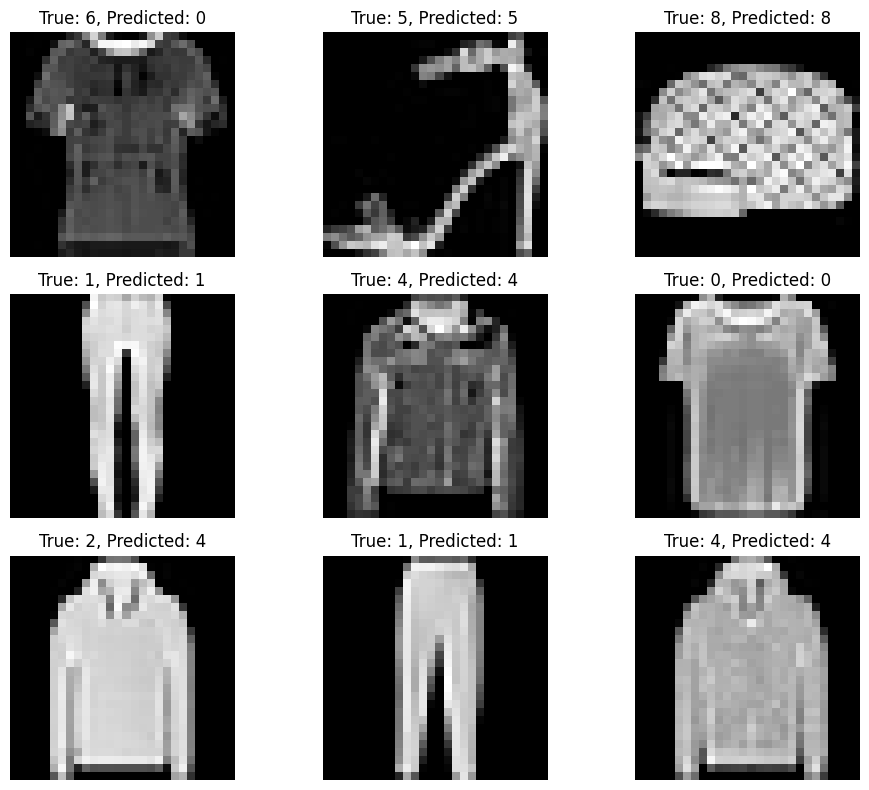

In [26]:
# Visualize CNN Predictions
cnn_pred = cnn_model.predict(X_test)
plt.figure(figsize=(10, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    index = np.random.randint(0, len(X_test))
    plt.imshow(X_test[index], cmap='gray')
    plt.title(f"True: {y_test[index]}, Predicted: {cnn_pred[index].argmax()}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Conclusions

- The Convolutional Neural Networks model has the highest validation accuracy of 0.89
- SVM and Random Forest models also showed competitive performance (SVM Accuracy: 0.88, Random Forest Accuracy: 0.87, LogisticRegression: 0.84) but less than CNN Model.
- The Decision Tree Classifier has a accuracy performance of 0.79 so it was the less acurated in our analysis.
- Fine-tuning hyperparameters improved models performance, always the model accuracy increased with hyperparameters cross validation, given us to understant the importance of hyperparameter optimization in ML models.
- As we can see the models are very accurated for image classification tasks, especially with well-structured datasets like Fashion-MNIST from tensor flow because the data pre-procesing and number of samples are good, there are not data imbalances as we saw in the dataset distribution chart above.